<a href="https://colab.research.google.com/github/gitmystuff/DTSC5810/blob/main/Week_07-Predictive_Analytics/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## The Data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/Datasets/main/telco.csv')
print(df.shape)
print(df.info())
df.head()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# some cells are empty with a space and don't show up as missing values
print(df.shape)
print(len(df[df['TotalCharges'] == ' ']))
df = df[df['TotalCharges'] != ' ']
print(df.shape)
print(len(df[df['TotalCharges'] == ' ']))

(7043, 21)
11
(7032, 21)
0


In [4]:
# check number of unique values per feature
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

## Exploratory Data Analysis

In [6]:
# delete features with high cardinality and make a summary table
df.drop(['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
summary = pd.concat([pd.crosstab(df[x], df.Churn) for x in df.columns[:-1]], keys=df.columns[:-1])
summary['Churn_Percentage'] = summary['Yes'] / (summary['Yes'] + summary['No'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2544   939          0.269595
                 Male                       2619   930          0.262046
SeniorCitizen    0                          4497  1393          0.236503
                 1                           666   476          0.416813
Partner          No                         2439  1200          0.329761
                 Yes                        2724   669          0.197171
Dependents       No                         3390  1543          0.312791
                 Yes                        1773   326          0.155312
PhoneService     No                          510   170          0.250000
                 Yes                        4653  1699          0.267475
MultipleLines    No                         2536   849          0.250812
                 No phone service            510   170          0.250000
                 Yes                        2117   850          0.286485
InternetService  DSL                        1957   459          0.189983
                 Fiber optic                1799  1297          0.418928
                 No                         1407   113          0.074342
OnlineSecurity   No                         2036  1461          0.417787
                 No internet service        1407   113          0.074342
                 Yes                        1720   295          0.146402
OnlineBackup     No                         1854  1233          0.399417
                 No internet service        1407   113          0.074342
                 Yes                        1902   523          0.215670
DeviceProtection No                         1883  1211          0.391403
                 No internet service        1407   113          0.074342
                 Yes                        1873   545          0.225393
TechSupport      No                         2026  1446          0.416475
                 No internet service        1407   113          0.074342
                 Yes                        1730   310          0.151961
StreamingTV      No                         1867   942          0.335351
                 No internet service        1407   113          0.074342
                 Yes                        1889   814          0.301147
StreamingMovies  No                         1843   938          0.337289
                 No internet service        1407   113          0.074342
                 Yes                        1913   818          0.299524
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1306   166          0.112772
                 Two year                   1637    48          0.028487
PaperlessBilling No                         2395   469          0.163757
                 Yes                        2768  1400          0.335893
PaymentMethod    Bank transfer (automatic)  1284   258          0.167315
                 Credit card (automatic)    1289   232          0.152531
                 Electronic check           1294  1071          0.452854
                 Mailed check               1296   308          0.192020

## Categorical Encoding

In [7]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

target_col = ['Churn']

# categorical features
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

# binary features
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

# non-binary features
multi_cols = [i for i in cat_cols if i not in bin_cols]

# encode binary features
le = LabelEncoder()
for i in bin_cols:
  df[i] = le.fit_transform(df[i])

# get dummies for the rest
print(df.shape)
df = pd.get_dummies(data=df, columns=multi_cols)
print(df.shape)
print(df.info())
df.head()

(7032, 17)
(7032, 38)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7032 non-null   int64
 1   SeniorCitizen                            7032 non-null   int64
 2   Partner                                  7032 non-null   int64
 3   Dependents                               7032 non-null   int64
 4   PhoneService                             7032 non-null   int64
 5   PaperlessBilling                         7032 non-null   int64
 6   Churn                                    7032 non-null   int64
 7   MultipleLines_No                         7032 non-null   bool 
 8   MultipleLines_No phone service           7032 non-null   bool 
 9   MultipleLines_Yes                        7032 non-null   bool 
 10  InternetService_DSL                      7032 non-null 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,1,0,0,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,1,1,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0,0,0,False,True,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,1,1,1,True,False,False,...,True,False,False,True,False,False,False,False,True,False


In [8]:
# drop na for this demo
print(df.shape)
df.dropna(inplace=True)
print(df.shape)


(7032, 38)
(7032, 38)


## The Model

In [9]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Churn'], axis=1), df['Churn'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5625, 37), (1407, 37))

Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64


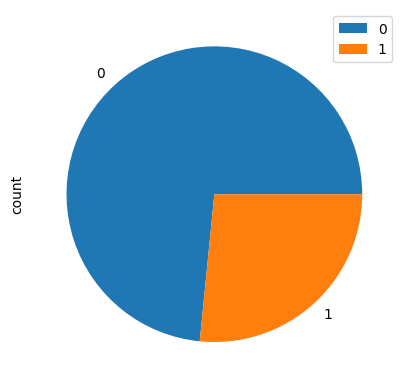

In [10]:
# see if the target is balanced
print(y_train.value_counts(normalize=True))
y_train.value_counts().plot.pie(labels=['0', '1']).legend();

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(class_weight='balanced', solver='liblinear')
lr.fit(X_train.values, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7235252309879175
[[721 312]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [12]:
# feature importance per coefficients
coef = [abs(c) for c in lr.coef_[0]]
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': coef})
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
32,Contract_Two year,1.145806
30,Contract_Month-to-month,1.133554
9,InternetService_DSL,0.445662
10,InternetService_Fiber optic,0.368841
14,OnlineSecurity_Yes,0.315062
34,PaymentMethod_Credit card (automatic),0.279391
12,OnlineSecurity_No,0.238241
23,TechSupport_Yes,0.234940
35,PaymentMethod_Electronic check,0.233322
31,Contract_One year,0.228105


## Saving the Model

In [13]:
# save model
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(lr, f)

In [14]:
# load model
with open('model.pkl', 'rb') as f:
  lr = pickle.load(f)

In [15]:
# make a prediction
idx1 = y_test.index[y_test.values == 1][0]
idx0 = y_test.index[y_test.values == 0][0]
print(idx1, idx0)
print(X_test.loc[idx1])
print(X_test.loc[idx0])

6125 2481
gender                                         1
SeniorCitizen                                  0
Partner                                        1
Dependents                                     0
PhoneService                                   1
PaperlessBilling                               1
MultipleLines_No                           False
MultipleLines_No phone service             False
MultipleLines_Yes                           True
InternetService_DSL                        False
InternetService_Fiber optic                 True
InternetService_No                         False
OnlineSecurity_No                           True
OnlineSecurity_No internet service         False
OnlineSecurity_Yes                         False
OnlineBackup_No                             True
OnlineBackup_No internet service           False
OnlineBackup_Yes                           False
DeviceProtection_No                        False
DeviceProtection_No internet service       False
DeviceProt

In [16]:
print(lr.predict(X_test.loc[idx0].values.reshape(1, -1)))
lr.predict_proba(X_test.loc[idx0].values.reshape(1, -1))

[0]


array([[0.95808811, 0.04191189]])

In [17]:
print(lr.predict(X_test.loc[idx1].values.reshape(1, -1)))
lr.predict_proba(X_test.loc[idx1].values.reshape(1, -1))

[1]


array([[0.23143749, 0.76856251]])